# Statistical Analysis

In this notebook, I am performing a thorough analysis of the wage1 dataset. 

- Descrivestive statistics
- Distributions of variables and outliers with box and density plots
- Correlation Analysis
- Regression Analysis
- Checking for Heteroscedasticity with plots and tests
- Log Transformation for Heteroscedasticity
- Log-Lin Model and Interpretation
- Checking for Multicollinearity with VIF
- Incorporating Categorical Variables
- Incorporating Interactions among Variables

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

In [343]:
df = pd.read_csv("wage1.csv")
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [344]:
df.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [345]:
num_var = ["wage", "educ", "exper", "tenure"]
df[num_var].describe()

,wage,educ,exper,tenure
count,526.000000,526.000000,526.00000,526.000000
mean,5.896103,12.562738,17.01711,5.104563
std,3.693086,2.769022,13.57216,7.224462
min,0.530000,0.000000,1.00000,0.000000
25%,3.330000,12.000000,5.00000,0.000000
50%,4.650000,12.000000,13.50000,2.000000
75%,6.880000,14.000000,26.00000,7.000000
max,24.980000,18.000000,51.00000,44.000000


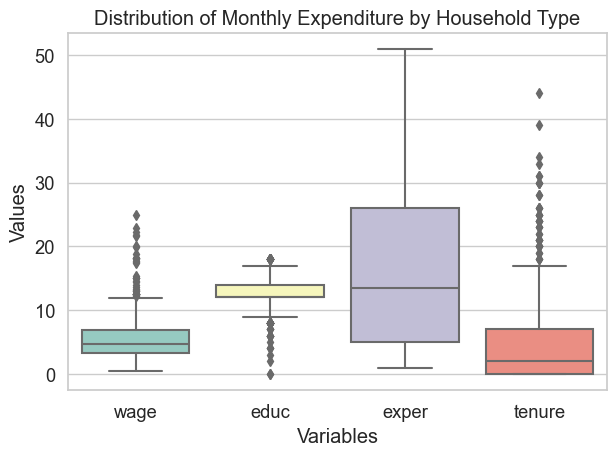

In [346]:
sns.set(style="whitegrid", font_scale=1.2)
sns.boxplot(df[num_var], palette="Set3")
plt.title('Distribution of Monthly Expenditure by Household Type')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

It seems that there are some outliers in the wage, educ, and tenure variables. 

C:\Users\hp\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



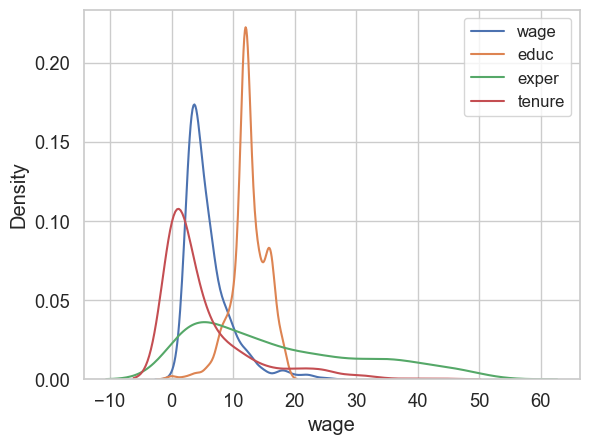

In [347]:
for col in num_var:
    sns.kdeplot(df[col], label=col)
    
plt.legend(fontsize=12)
plt.show()

# Correlation Analysis

In [348]:
corr = df[num_var].corr()
corr

,wage,educ,exper,tenure
wage,1.000000,0.405903,0.112903,0.346890
educ,0.405903,1.000000,-0.299542,-0.056173
exper,0.112903,-0.299542,1.000000,0.499291
tenure,0.346890,-0.056173,0.499291,1.000000


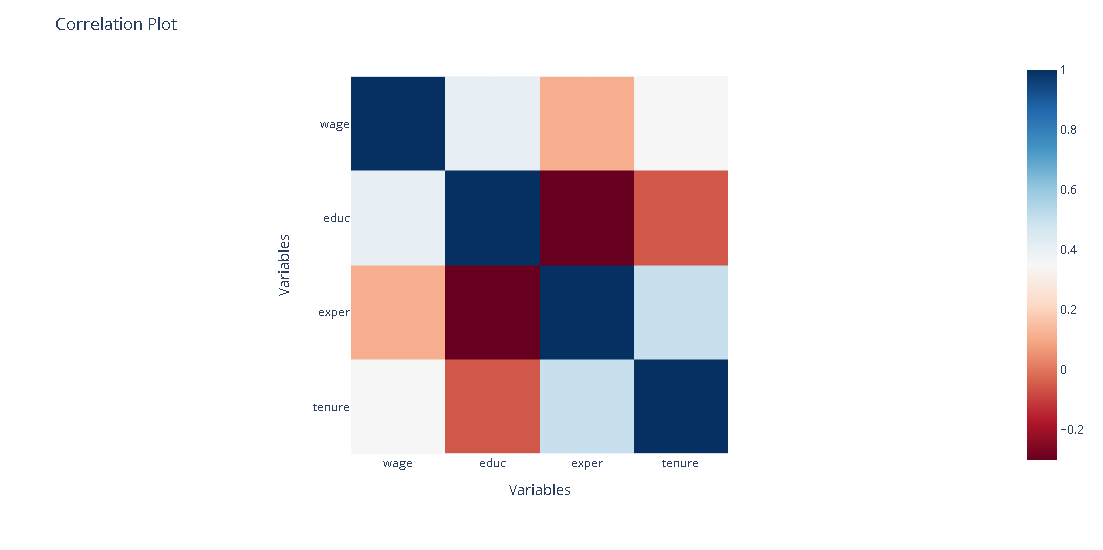

In [349]:
fig = px.imshow(corr, x=corr.index, y=corr.columns, color_continuous_scale='RdBu')
fig.update_layout(title='Correlation Plot',
                  xaxis_title='Variables',
                  yaxis_title='Variables',
                 width=550, height=550)
fig.show()

# Regression Analysis

In [350]:
# defining independent variables i.e. x's
x = df[num_var[1:]]
# add constant 
X = sm.add_constant(x)

X.head()

,const,educ,exper,tenure
0,1.0,11,2,0
1,1.0,12,22,2
2,1.0,11,2,0
3,1.0,8,44,28
4,1.0,12,7,2


In [351]:
# defining the dependent variable
y = df["wage"]

In [352]:
# fitting the OLS model
model = sm.OLS(y, X).fit()

# printing summary stats of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.41e-41
Time:                        17:40:21   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8727      0.729     -3.941      0.000      -4.305      -1.441
educ           0.5990      0.051     11.679      0.000       0.498       0.700
exper          0.0223      0.012      1.853      0.064      -0.001       0.046
tenure         0.1693      0.022      7.820      0.000       0.127       0.212
==============================================================================
Omnibus:                      179.597   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.807
Skew:                           1.555   Prob(JB):                    4.77e-142
Kurtosis:                       7.475   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation of the model

- The R-squared is approximately 0.306 which means that our model explains approximately 30% of the variation in the wages.
- The p-value associated with the F-statistic is less than 0.05 which tells us that the overall model is significant.

## Interpretation of the coefficients 
- The coeffiencients of educ and exper are statistically significant at 5% level of significance. That means that educ and exper are indeed crucial determinants of wages. 
- The coefficient of educ - 0.5990 indicates that, other variables remaining same, a one year increase in education increases the wages by approximately USD 60.
- The coefficient of tenure - 0.1693 indicates that, other variables remaining same, a one year increase in exper increases the wages by approximately USD 17.

- The coefficient of exper is coming out to be insignificant. That means, at 5% level of significance, we cannot reject the null hypothesis that the coefficient is not significantly different than 0. 

# Regression Diagnostics

#### Checking for multicollinearity in the model.

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as var_in_fac
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [var_in_fac(x.values, i) for i in range (x.shape[1])]

In [354]:
vif

,Features,VIF
0,educ,2.116039
1,exper,2.920735
2,tenure,2.007496


There does not seem to be multicollinearity issue in the model. Although, I suspect that the high correlation (as shown by the correlation plot) between exper and tenure is causing exper to be statitically insignificant. 

## **Checking for heteroscedastcity in the model.**

### Residual Plot Method

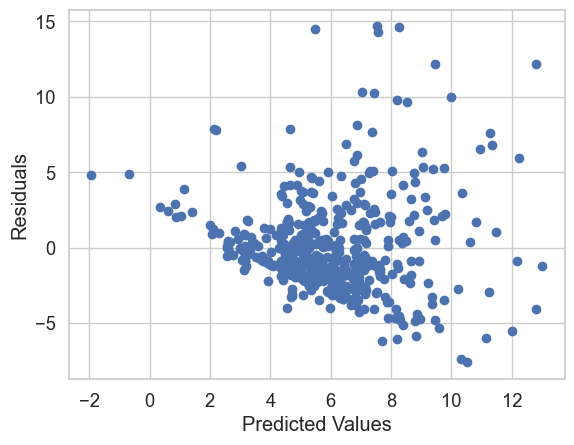

In [355]:
plt.scatter(model.predict(), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## **Formal Tests for Heteroscedasticity**
- White's Test
- Breusch-Pagan Test
- Goldfeld-Quandt Test

In [356]:
from statsmodels.stats.diagnostic import het_white, het_breuschpagan, het_goldfeldquandt

white_test = het_white(model.resid, X)
print("White's Test p-value:", white_test[1])

White's Test p-value: 2.2976808119558856e-10


In [357]:
bp_test = het_breuschpagan(model.resid, X)
print("Breusch-Pagan Test p-value:", bp_test[1])

Breusch-Pagan Test p-value: 2.348602960731265e-09


In [358]:
g_test = het_goldfeldquandt(model.resid, X)
print("Goldfeld Test p-value:", g_test[1])

Goldfeld Test p-value: 0.9999353819271561


While White's Test and the Breusch-Pagan Test both provide strong evidence of heteroscedasticity, the Goldfeld Test suggests otherwise.

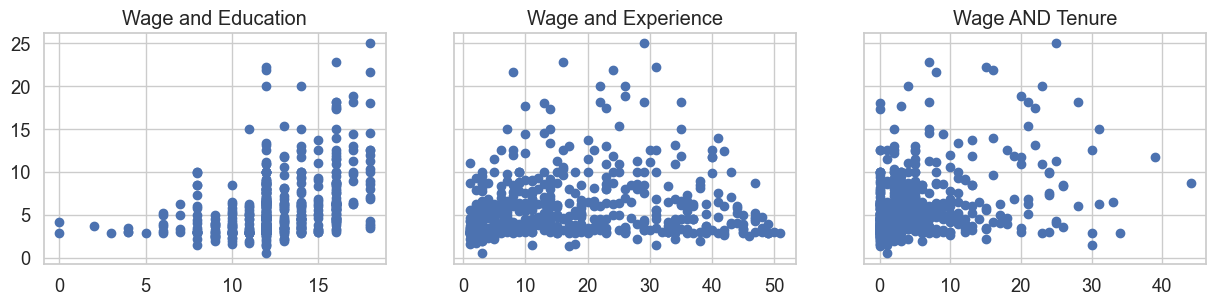

In [359]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(df[num_var[1]], df[num_var[0]])
ax1.set_title("Wage and Education")

ax2.scatter(df[num_var[2]], df[num_var[0]])
ax2.set_title("Wage and Experience")

ax3.scatter(df[num_var[3]], df[num_var[0]])
ax3.set_title("Wage AND Tenure")

plt.show()

## **Log Transformation for Heteroscedasticity**

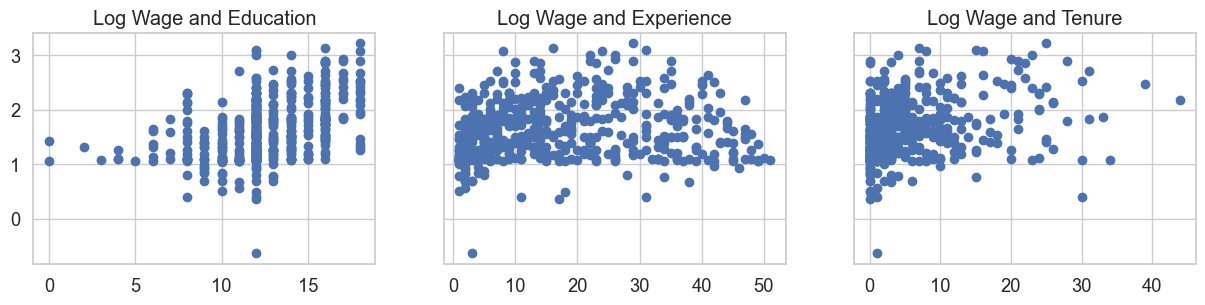

In [360]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(df[num_var[1]], np.log(df[num_var[0]]))
ax1.set_title("Log Wage and Education")

ax2.scatter(df[num_var[2]], np.log(df[num_var[0]]))
ax2.set_title("Log Wage and Experience")

ax3.scatter(df[num_var[3]], np.log(df[num_var[0]]))
ax3.set_title("Log Wage and Tenure")

plt.show()

## **Log-Lin Model**

In [361]:
y = np.log(df[num_var[0]])
x = df[num_var[1:]]
X = sm.add_constant(x)

log_model = sm.OLS(y, X).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           9.13e-43
Time:                        17:42:50   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.104      2.729      0.007       0.080       0.489
educ           0.0920      0.007     12.555      0.000       0.078       0.106
exper          0.0041      0.002      2.391      0.017       0.001       0.008
tenure         0.0221      0.003      7.133      0.000       0.016       0.028
==============================================================================
Omnibus:                       11.534   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.941
Skew:                           0.021   Prob(JB):                     2.84e-05
Kurtosis:                       3.977   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation of the log-lin model
- Comparing with the previous model, we can observe that the coefficient of experience is now significant.
- The coefficient of the variable educ, that is, 0.092 means that an increase in the level of education by 1 unit leads to approximately 9% increase in the wages. The coefficient of other variables have similar interpretation.

Text(0.5, 1.0, 'Log Model')

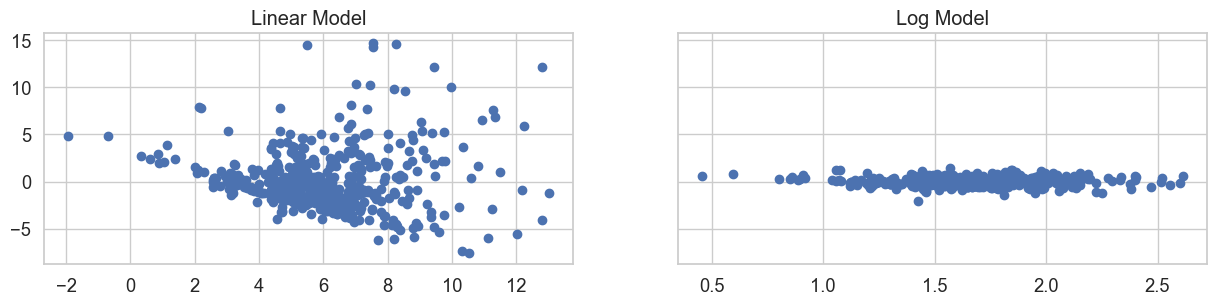

In [362]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 3))
ax1.scatter(model.predict(), model.resid)
ax1.set_title("Linear Model")

ax2.scatter(log_model.predict(), log_model.resid)
ax2.set_title("Log Model")

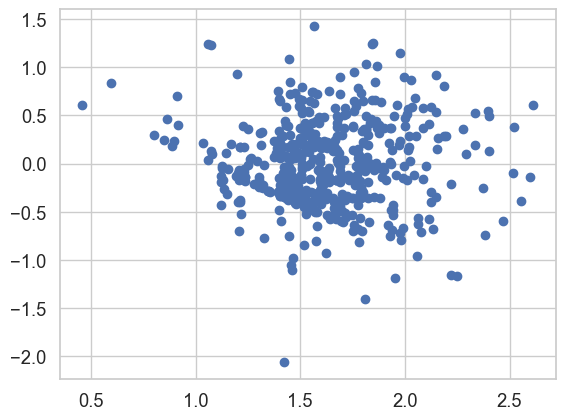

In [363]:
plt.scatter(log_model.predict(), log_model.resid)

## **Incorporating categorical variables**

### 1. Are female workers paid less than their male counterparts?

### 2. Is there wage discrimination based on color?

In [364]:
df.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman',
       'trcommpu', 'trade', 'services', 'profserv', 'profocc', 'clerocc',
       'servocc', 'lwage', 'expersq', 'tenursq'],
      dtype='object')

In [406]:
x = df[df.columns[1:7]]
X = sm.add_constant(x)
X.head()

,const,educ,exper,tenure,nonwhite,female,married
0,1.0,11,2,0,0,1,0
1,1.0,12,22,2,0,1,1
2,1.0,11,2,0,0,0,0
3,1.0,8,44,28,0,0,1
4,1.0,12,7,2,0,0,1


In [407]:
y = np.log(df["wage"])

In [408]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     58.54
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.15e-55
Time:                        22:28:52   Log-Likelihood:                -277.50
No. Observations:                 526   AIC:                             569.0
Df Residuals:                     519   BIC:                             598.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4907      0.102      4.800      0.000       0.290       0.692
educ           0.0839      0.007     11.984      0.000       0.070       0.098
exper          0.0031      0.002      1.861      0.063      -0.000       0.006
tenure         0.0169      0.003      5.702      0.000       0.011       0.023
nonwhite      -0.0025      0.060     -0.042      0.966      -0.120       0.115
female        -0.2856      0.037     -7.654      0.000      -0.359      -0.212
married        0.1256      0.040      3.133      0.002       0.047       0.204
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.132
Skew:                           0.071   Prob(JB):                     2.58e-05
Kurtosis:                       3.972   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

**coeffiecient of non-white**

Holding other variables constant at 0, a non-white worker is expected to earn 0.0025 less on an average than white workers. But this result is not statistically significant even at 10% level of significance, indicating that there might not be wage discrimination based on color.

**coefficient of female**

Holding other variales (educ, exper, tenure, nonwhite) constant at 0, a female worker would be expected to earn 0.2856 less on an average compared to their male counterparts. This result is statistically significant indicating that there is indeed a gender pay gap.

**Collinearity in the model**

One more interesting observation is that the model states that, on an average, other variables remaining constant at 0, married workers are earning 0.1256 more than the unmarried workers. And the result is statistically significant. 

But one thing that is catching my attention is that the coefficient of 'exper' has now become statistically insiginificant at 5% level of significance with the inclusion of 'married' variable. Intuition says that the two variables are correlated, since, a married worker is likely to have more work experience. 

## **Incorporating Interactions Among Variables**

### Do married female workers earn less than the unmarried female workers?

In [401]:
df["married_female"] = df["female"]*df["married"]

In [402]:
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,female*nonwhite,married_female
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,1.131402,4,0,0,0
1,3.24,12,22,2,0,1,1,3,1,0,...,1,0,0,0,1,1.175573,484,4,0,1
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,0,1.098612,4,0,0,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,1,0,1.791759,1936,784,0,0
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,1.667707,49,4,0,0


In [403]:
xs = pd.concat([df[df.columns[1:7]], df[df.columns[-1]]], axis=1)
Xs = sm.add_constant(xs)
y = df["lwage"]

Xs.head()

,const,educ,exper,tenure,nonwhite,female,married,married_female
0,1.0,11,2,0,0,1,0,0
1,1.0,12,22,2,0,1,1,1
2,1.0,11,2,0,0,0,0,0
3,1.0,8,44,28,0,0,1,0
4,1.0,12,7,2,0,0,1,0


In [404]:
reg = sm.OLS(y, Xs).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     54.46
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.59e-58
Time:                        22:20:15   Log-Likelihood:                -268.39
No. Observations:                 526   AIC:                             552.8
Df Residuals:                     518   BIC:                             586.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3919      0.103      3.798      0.000       0.189       0.595
educ               0.0834      0.007     12.104      0.000       0.070       0.097
exper              0.0032      0.002      1.910      0.057   -8.95e-05       0.006
tenure             0.0157      0.003      5.367      0.000       0.010       0.021
nonwhite          -0.0189      0.059     -0.321      0.748      -0.134       0.097
female            -0.0961      0.058     -1.670      0.095      -0.209       0.017
married            0.2921      0.055      5.270      0.000       0.183       0.401
married_female    -0.3171      0.074     -4.275      0.000      -0.463      -0.171
==============================================================================
Omnibus:                       14.796   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.587
Skew:                           0.072   Prob(JB):                     3.76e-07
Kurtosis:                       4.153   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

**Coefficient of married_female**

Holding everything else constant at 0, a female worker is expected to earn 0.3171 less on an average *if she is married*.

Conclusion:- Married female workers do earn less on an average. 

**Collinearity in the model**

Inclusion of 'married_female' variable has made the coefficient of 'female' insignificant. The reason for this again is the aparent collinearity between 'female' and 'married_female' variables. 

